# 샘플 데이터와 Decision Tree Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

## 1. Data

### 1.1. Sample Data

In [2]:
data = {
    "value": [30, 120, 150, 390, 400, 300, 500],
    "label": [0, 0, 1, 0, 0, 1, 0]
}

In [3]:
data = pd.DataFrame(data)

## 2. Decision Tree

### 2.1 변수 값에 따라 데이터 정렬

In [4]:
sorted_data = data.sort_values(by="value")
sorted_data

,value,label
0,30,0
1,120,0
2,150,1
5,300,1
3,390,0
4,400,0
6,500,0


In [5]:
sorted_data = sorted_data.reset_index(drop=True)

In [7]:
sorted_data

,value,label
0,30,0
1,120,0
2,150,1
3,300,1
4,390,0
5,400,0
6,500,0


### 2.2 정답이 바뀌는 경계 지점 찾기

In [8]:
boundary = sorted_data["label"].diff()

In [9]:
boundary

0    NaN
1    0.0
2    1.0
3    0.0
4   -1.0
5    0.0
6    0.0
Name: label, dtype: float64

In [10]:
boundary = sorted_data["label"].diff() != 0

In [11]:
boundary

0     True
1    False
2     True
3    False
4     True
5    False
6    False
Name: label, dtype: bool

In [12]:
boundary[0] = False

In [13]:
boundary

0    False
1    False
2     True
3    False
4     True
5    False
6    False
Name: label, dtype: bool

In [14]:
boundary_idx = boundary.loc[boundary].index

In [15]:
boundary_idx

Int64Index([2, 4], dtype='int64')

### 2.3 경계의 평균값을 기준으로 잡기

첫번쨰 경계 구간

In [16]:
idx_1 = boundary_idx[0]

In [21]:
data.loc[[idx_1-1, idx_1]]

,value,label
1,120,0
2,150,1


In [19]:
bound_value_1 = data.loc[[idx_1-1, idx_1], "value"].mean()

In [22]:
bound_value_1

135.0

두번째 경계구간

In [23]:
idx_2 = boundary_idx[1]

In [24]:
bound_value_2 = data.loc[[idx_2-1, idx_2], "value"].mean()

In [25]:
bound_value_2

395.0

### 2.4 구간별 경계값을 기준으로 정보 이득을 계산

In [26]:
def gini_index(label):
  p1 = (label == 0).mean()
  p2 = 1 - p1
  return 1 - (p1 ** 2 + p2 ** 2)

def concat_gini_index(left, right):
  left_gini = gini_index(left)
  right_gini = gini_index(right)
  all_num = len(left) + len(right)
  left_gini *= len(left) / all_num
  right_gini *= len(right) / all_num
  return left_gini + right_gini

135를 경계로 나눌 때

In [27]:
left_1 = sorted_data.loc[:idx_1 -1, "label"]
right_1 = sorted_data.loc[idx_1:, "label"]

In [28]:
left_1

0    0
1    0
Name: label, dtype: int64

In [29]:
gini_index(right_1)

0.48

In [30]:
concat_gini_index(left_1, right_1)

0.34285714285714286

345를 경계로 나눌 때

In [31]:
left_2 = sorted_data.loc[:idx_2 -1, "label"]
right_2 = sorted_data.loc[idx_2:, "label"]

In [34]:
concat_gini_index(left_2, right_2)

0.2857142857142857

## 3.Decision Tree Package

In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(max_depth=1)

In [36]:
tree.fit(data["value"].to_frame(), data["label"])

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 345.0\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.25, 0.25, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

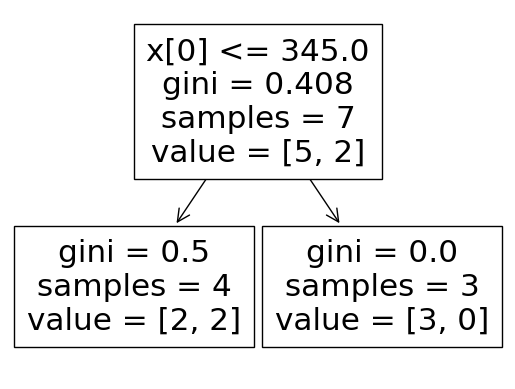

In [38]:
plot_tree(tree)